In [1]:
# WLDS - Water Leakage Detection system
# Standard imports
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import soundfile

# Plotting
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.style.use('ggplot')


In [2]:
# Copyright 2022 ns
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


#globals

import os
data_file_path = '/Users/ns/development/iisc/WLDS2/data/WAV/'
#datafile = 'data_RT.m4a'
datafile = 'data_21_FD.wav'
data_f = data_file_path + datafile

(head, tail) = os.path.split(data_f)
print(head)
print(tail)
# save_dir= os.path.join(head, 'cleaned')
# to_be_saved_as = os.path.join(
#     save_dir, "f_" + os.path.splitext(tail)[0] + ".mp3")
# print(to_be_saved_as)

#Audio(filename = data_f)


/Users/ns/development/iisc/WLDS2/data/WAV
data_21_FD.wav


In [3]:
# load sample 

y, sr = librosa.load(data_f)
#print(y)
rec_time = y.shape[0]/sr
Audio(data=y, rate=sr)
#print(rec_time)
S_full, phase = librosa.magphase(librosa.stft(y))



In [4]:
#Features to extract
#(1) MFCC (Mel-Frequency Cepstral Coefficients):
    #print(librosa.feature.mfcc(y=y, sr=sr))
#(2) Zero-crossing rate:
    #print(librosa.feature.zero_crossing_rate(y))
#(3) Energy
#(4) Spectral-roll off
    #print(librosa.feature.spectral_rolloff(S=S, sr=sr))
#(5) Spectral flux
    #onset_env = librosa.onset.onset_strength(y=y, sr=sr)
#(6) Spectral entropy
f1_mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr))
f2_zero_cross = np.mean(librosa.feature.zero_crossing_rate(y))
f4_spec_rolloff = np.mean(librosa.feature.spectral_rolloff(S=S_full, sr=sr))
f5_onset_str = np.mean(librosa.onset.onset_strength(y=y, sr=sr))
print(f1_mfcc)
print(f2_zero_cross)
print(f4_spec_rolloff)
print(f5_onset_str)



-15.425558
0.08508724369085173
4707.229527614846
0.99900967


In [5]:
# Copyright 2022 ns
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



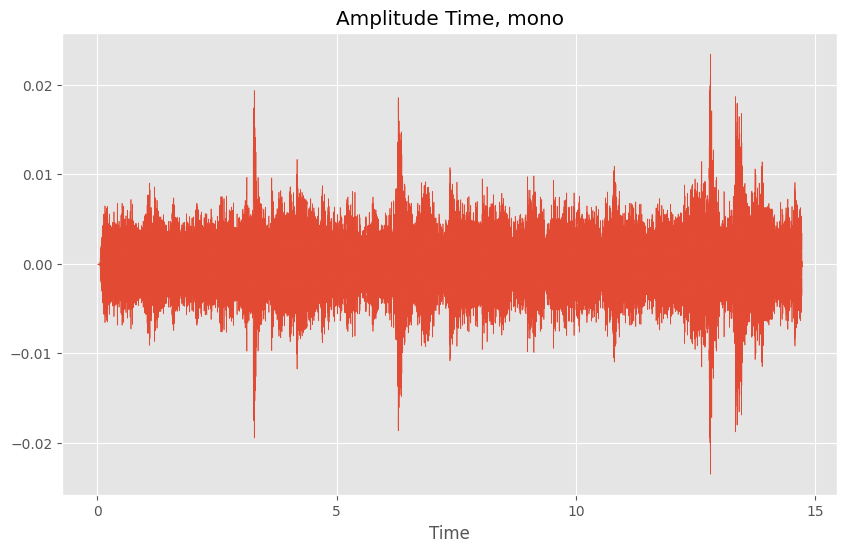

In [6]:
# Amplitude Time 
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.set(title='Amplitude Time, mono')
ax.label_outer()



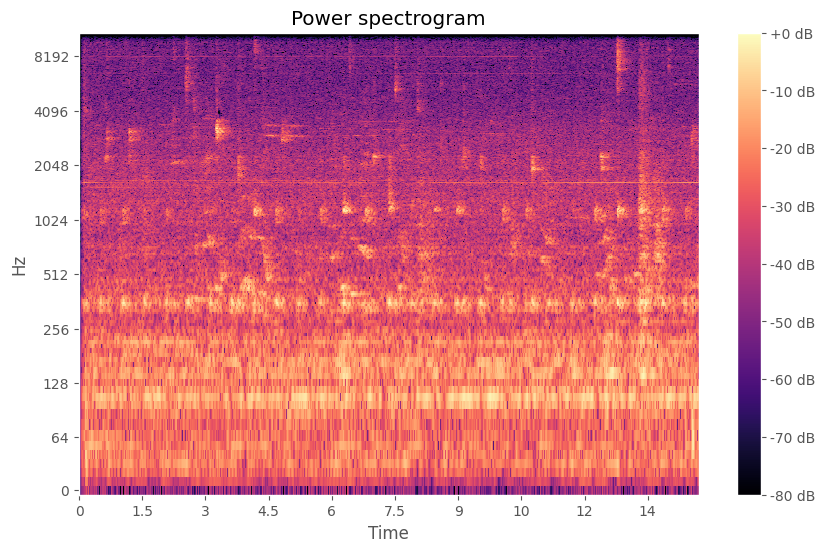

In [7]:
# FFT
# amplitude to freq
S = np.abs(librosa.stft(y))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
         y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


y_percussive
y_harmonic


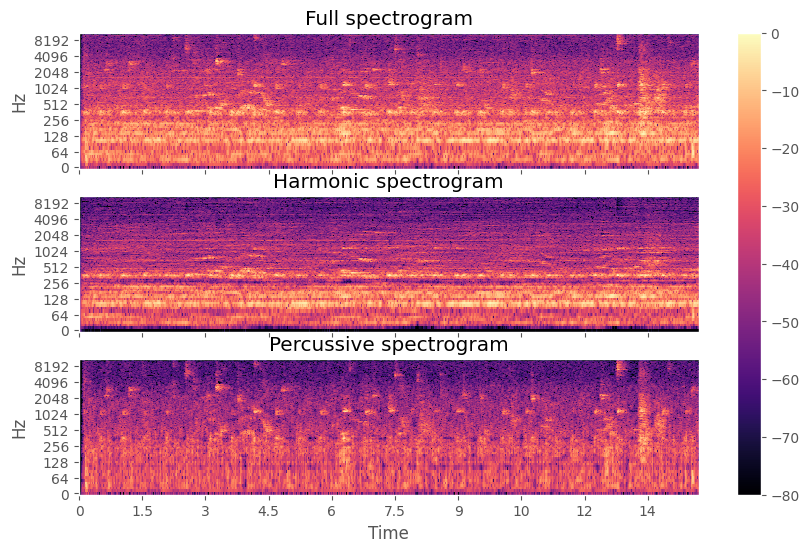

In [8]:
# Energy 
# STFT was computed earlier

D_harmonic, D_percussive = librosa.decompose.hpss(S)

# Pre-compute a global reference power from the input spectrum
rp = np.max(S)

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=rp),
                               y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)
# invert and replay
print("y_percussive")
y_percussive = librosa.istft(D_percussive, length=len(y))
Audio(data=y_percussive, rate=sr)
print("y_harmonic")
y_harmonic = librosa.istft(D_harmonic, length=len(y))
Audio(data=y_percussive, rate=sr)


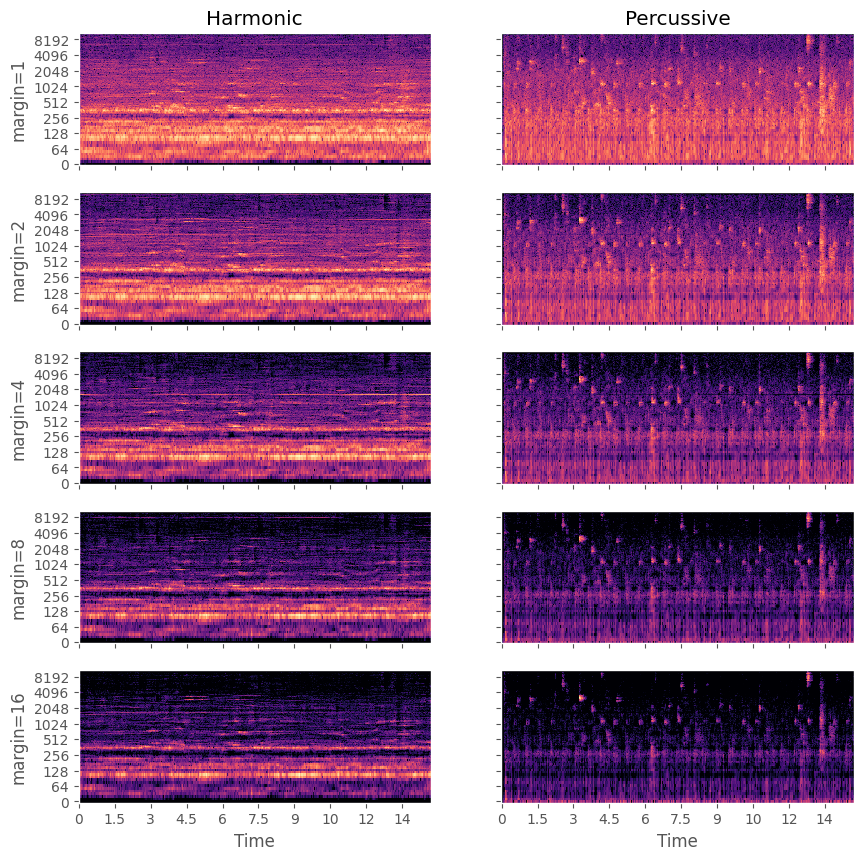

In [9]:
# Experiemnts with margin to separate noise
# # Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(S, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(S, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(S, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(S, margin=16)
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0, 0])
ax[0, 0].set(title='Harmonic')

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0, 1])
ax[0, 1].set(title='Percussive')

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic2), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive2), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic4), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive4), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic8), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[3, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive8), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[3, 1])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic16), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[4, 0])

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive16), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[4, 1])

for i in range(5):
    ax[i, 0].set(ylabel='margin={:d}'.format(2**i))
    ax[i, 0].label_outer()
    ax[i, 1].label_outer()

#Harmonic, Percussive


In [10]:
#Play #

y_harmonic4 = librosa.istft(D_harmonic4, length=len(y))
#Audio(data=y_harmonic4, rate=sr)

print("perc16 - sounds best")
y_percussive16 = librosa.istft(D_percussive16, length=len(y))
f3_energy = y_percussive16

Audio(data=y_percussive16, rate=sr)
# print("perc8")
# y_percussive8 = librosa.istft(D_percussive8, length=len(y))
# Audio(data=y_percussive4, rate=sr)


perc16 - sounds best


In [11]:
# first plot


idx = slice(*librosa.time_to_frames([0, rec_time], sr=sr))
#print(idx)
# fig, ax = plt.subplots()
# img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
#                          y_axis='log', x_axis='time', sr=sr, ax=ax)
# fig.colorbar(img, ax=ax, format='%+02.0f dB')
# plt.show()



In [12]:
#filters
# We'll compare frames using cosine similarity, and aggregate similar frames
# by taking their (per-frequency) median value.
#
# To avoid being biased by local continuity, we constrain similar frames to be
# separated by at least 2 seconds.
#
# This suppresses sparse/non-repetetitive deviations from the average spectrum,
# and works well to discard vocal elements.

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(0.5, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimum
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)



In [13]:
#

#We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 16
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once #we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full


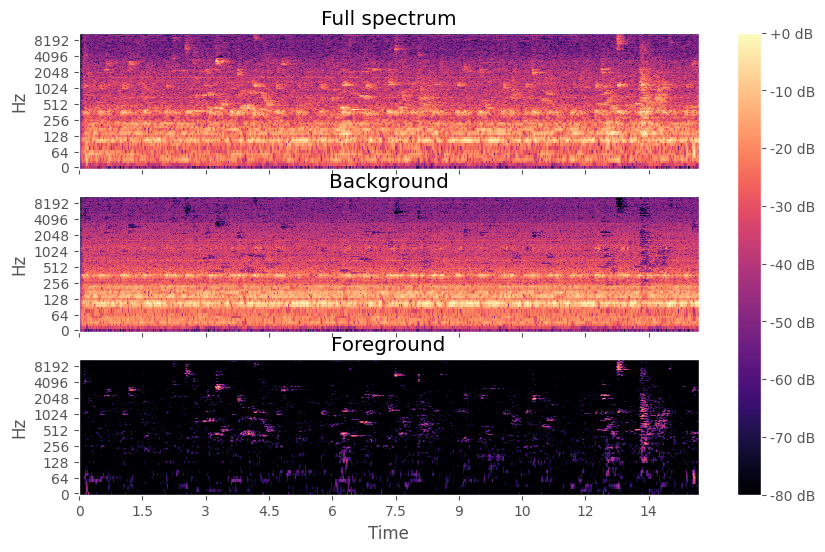

In [14]:
idx = slice(*librosa.time_to_frames([0, rec_time], sr=sr))
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                               y_axis='log', x_axis='time', sr=sr, ax=ax[0])

ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax, format='%+02.0f dB')
plt.show()



In [15]:
#ecover phase info


y_foreground = librosa.istft(S_foreground * phase)
f6_entropy = y_foreground

y_background = librosa.istft(S_background * phase)
print("foreground({}): {}".format(len(y_foreground), y_foreground))
#print("foreground")
#soundfile.write(to_be_saved_as, y_foreground, sr)

Audio(data=y_foreground, rate=sr)


foreground(324096): [0.0000000e+00 1.1386265e-15 1.6754463e-15 ... 3.4103668e-05 4.4068121e-05
 4.2857439e-05]


In [16]:
# 
print("background")
Audio(data=y_background, rate=sr)


background


In [17]:
#Feature dictionnary
import pandas as pd

feature_data =  {'filename': data_f,
                'f1_mfcc': f1_mfcc, 'f2_zero_cross': f2_zero_cross, 'f3_energy': f3_energy,
                'f4_spec_rolloff': f4_spec_rolloff, 'f5_onset_str': f5_onset_str,
                'f6_entropy': f6_entropy}


print(feature_data)


{'filename': '/Users/ns/development/iisc/WLDS2/data/WAV/data_21_FD.wav', 'f1_mfcc': -15.425558, 'f2_zero_cross': 0.08508724369085173, 'f3_energy': array([4.4888657e-10, 4.8478471e-10, 4.7327120e-10, ..., 6.6654420e-06,
       6.0946845e-06, 9.5210880e-06], dtype=float32), 'f4_spec_rolloff': 4707.229527614846, 'f5_onset_str': 0.99900967, 'f6_entropy': array([0.0000000e+00, 1.1386265e-15, 1.6754463e-15, ..., 3.4103668e-05,
       4.4068121e-05, 4.2857439e-05], dtype=float32)}
